Columns: ['unnamed: 0', 'stock', 'timestamp', 'open', 'high', 'low', 'adj_close', 'volume']

Missing values:
 unnamed: 0    0
stock         0
timestamp     0
open          0
high          0
low           0
adj_close     0
volume        0
date          0
dtype: int64

Duplicate rows: 0

Basic statistics:
           unnamed: 0     timestamp           open           high  \
count  168615.000000  1.686150e+05  168615.000000  168615.000000   
mean    84307.000000  1.256364e+09      32.532680      32.972975   
min         0.000000  9.649944e+08       0.080000       0.080000   
25%     42153.500000  1.118268e+09       9.350000       9.520000   
50%     84307.000000  1.258585e+09      17.280000      17.540000   
75%    126460.500000  1.397599e+09      32.820000      33.240000   
max    168614.000000  1.532988e+09    1876.050000    1880.050000   
std     48675.102157  1.625346e+08      75.427145      76.158823   

                 low      adj_close        volume  \
count  168615.000000  168615

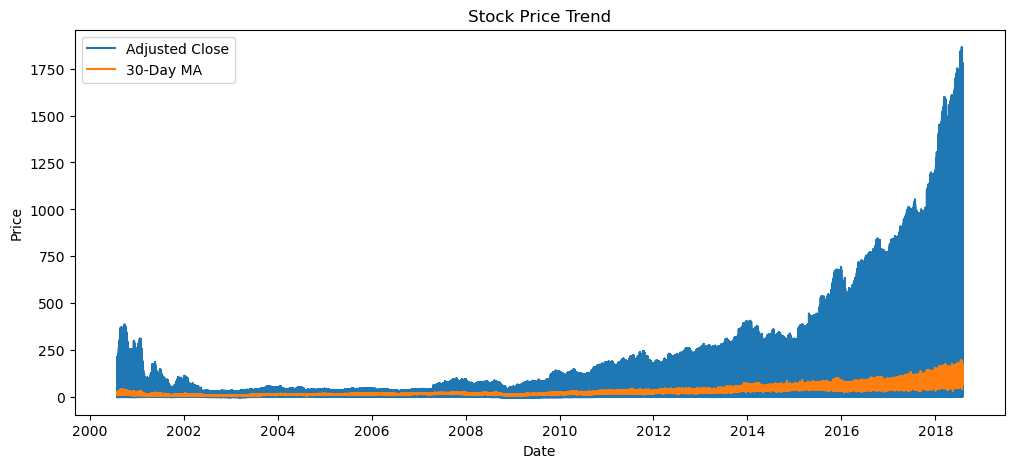

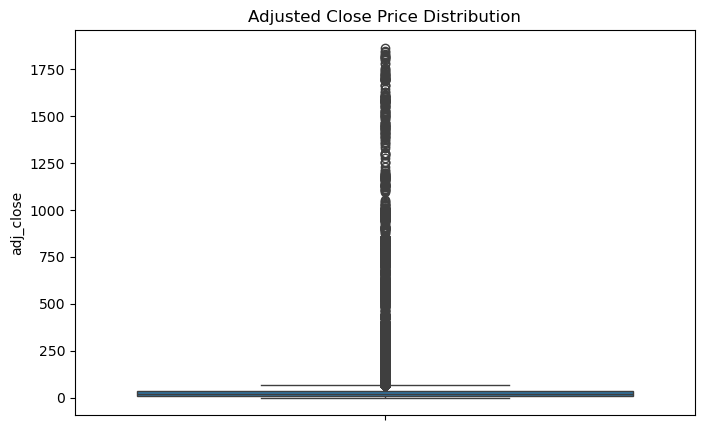

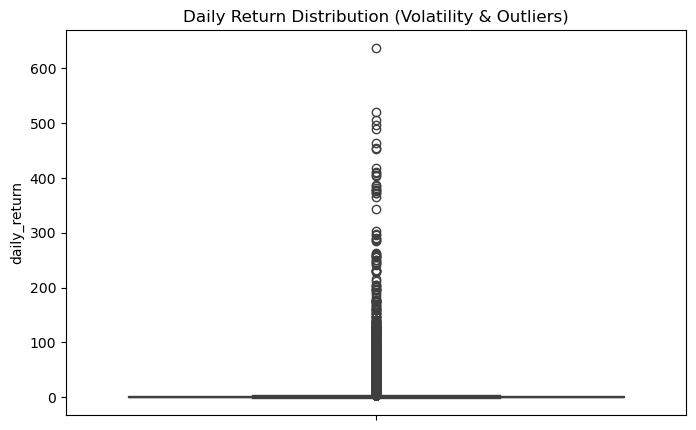

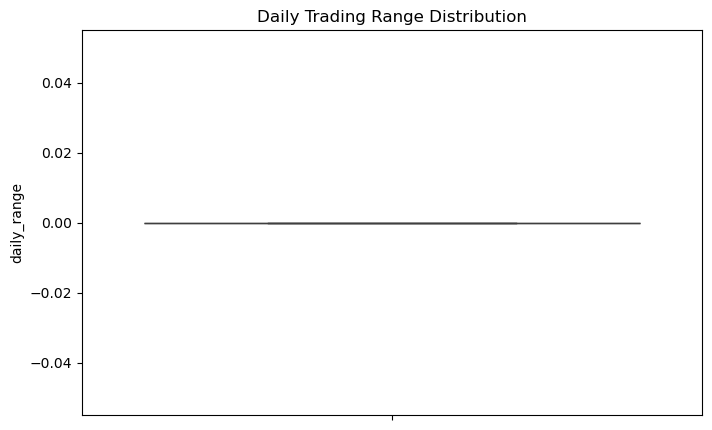

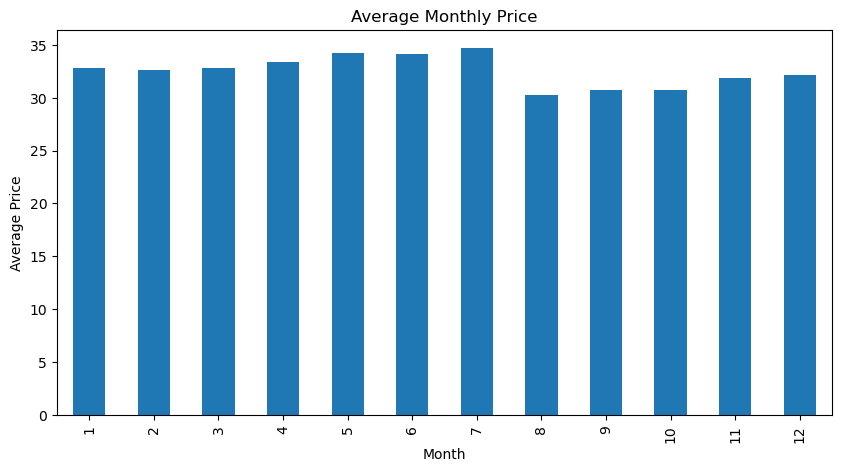

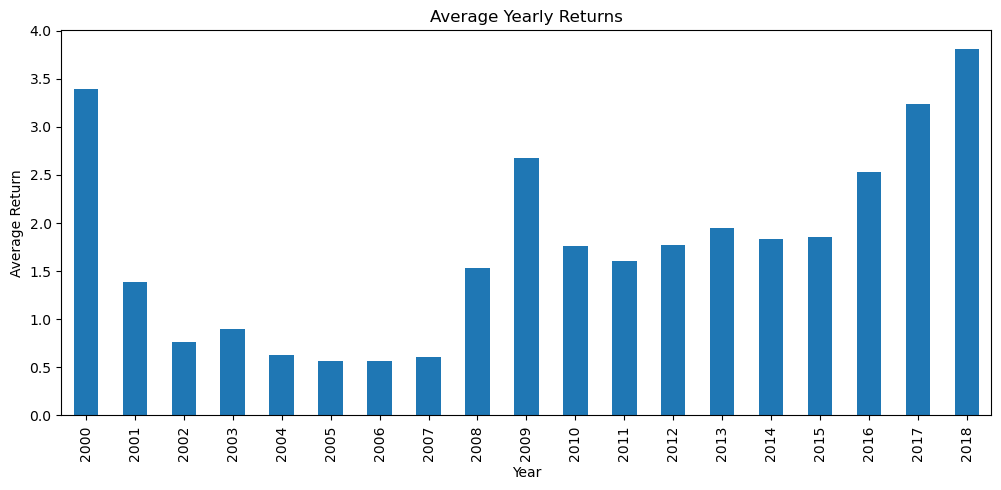

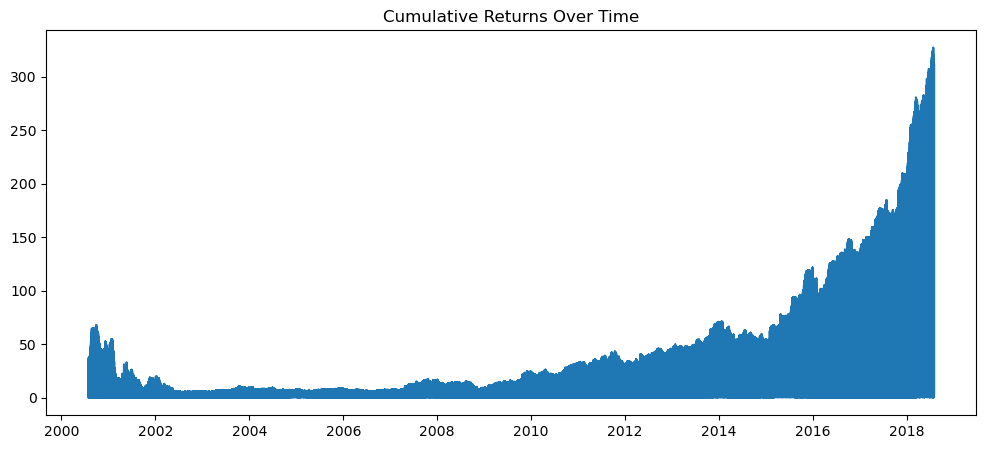

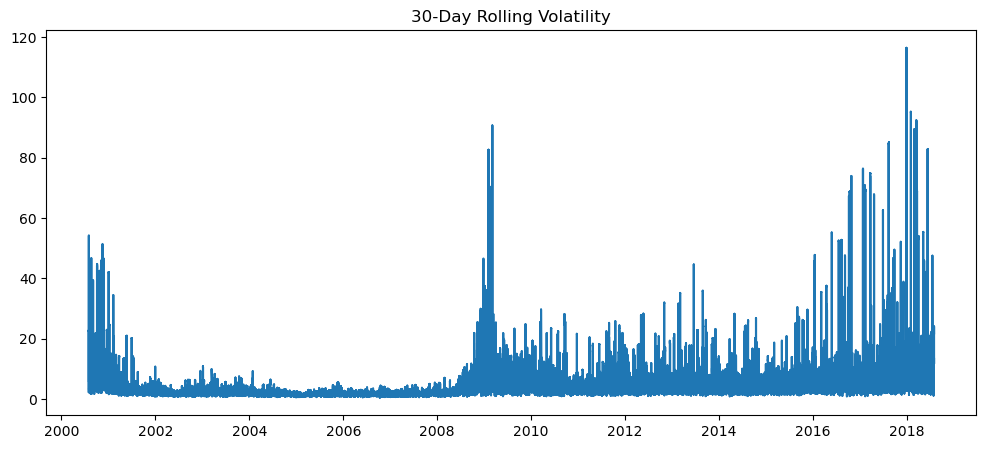

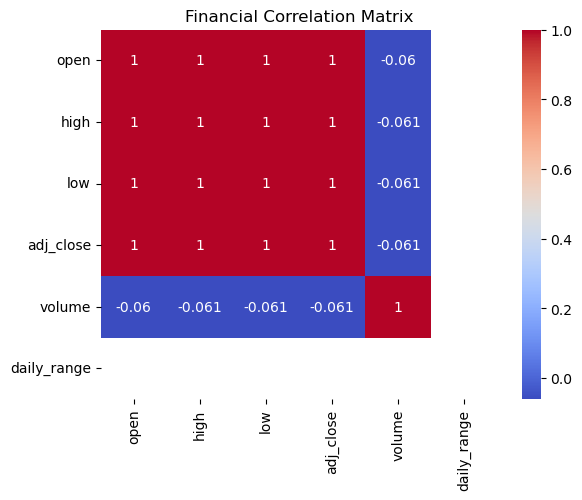


Highest price: 1863.61
Lowest price: 0.06

Most volatile day:
 unnamed: 0                        161372
stock                               AMZN
timestamp                     1514329200
open                             1179.91
high                             1187.29
low                              1187.29
adj_close                        1182.26
volume                           1867208
date                 2017-12-26 23:00:00
daily_return                  638.059459
ma30                           87.773667
daily_range                          0.0
year                                2017
month                                 12
cumulative_return             207.414035
volatility_30                 116.168322
Name: 161372, dtype: object

Worst crash day:
 unnamed: 0                           154
stock                               GERN
timestamp                     1513551600
open                                2.01
high                                2.05
low                         

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("financial_data_2000_2018_cleaned.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

print("Columns:", df.columns.tolist())

# Convert timestamp to date
df["date"] = pd.to_datetime(df["timestamp"], unit="s")

df = df.sort_values("date")

df.head()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

print("\nBasic statistics:\n", df.describe())
# Daily returns
df["daily_return"] = df["adj_close"].pct_change()

# Moving average
df["ma30"] = df["adj_close"].rolling(30).mean()

# Daily range
df["daily_range"] = df["high"] - df["low"]

# Year & month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

df.head()
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["adj_close"], label="Adjusted Close")
plt.plot(df["date"], df["ma30"], label="30-Day MA")
plt.title("Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(y=df["adj_close"])
plt.title("Adjusted Close Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(y=df["daily_return"])
plt.title("Daily Return Distribution (Volatility & Outliers)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(y=df["daily_range"])
plt.title("Daily Trading Range Distribution")
plt.show()
# Average monthly price
monthly_price = df.groupby("month")["adj_close"].mean()

plt.figure(figsize=(10,5))
monthly_price.plot(kind="bar")
plt.title("Average Monthly Price")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

# Average yearly returns
yearly_return = df.groupby("year")["daily_return"].mean()

plt.figure(figsize=(12,5))
yearly_return.plot(kind="bar")
plt.title("Average Yearly Returns")
plt.xlabel("Year")
plt.ylabel("Average Return")
plt.show()
# Cumulative return
df["cumulative_return"] = (1 + df["daily_return"]).cumprod()

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["cumulative_return"])
plt.title("Cumulative Returns Over Time")
plt.show()

# Volatility
df["volatility_30"] = df["daily_return"].rolling(30).std()

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["volatility_30"])
plt.title("30-Day Rolling Volatility")
plt.show()
sns.heatmap(df[["open","high","low","adj_close","volume","daily_range"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Financial Correlation Matrix")
plt.show()
print("\nHighest price:", df["adj_close"].max())
print("Lowest price:", df["adj_close"].min())

print("\nMost volatile day:\n", df.loc[df["daily_return"].idxmax()])
print("\nWorst crash day:\n", df.loc[df["daily_return"].idxmin()])
